In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import warnings
warnings.filterwarnings('ignore')

## Read Files

파일명 다 그대로 사용하였습니다!

In [ ]:
job_df = pd.read_csv('/content/drive/MyDrive/24-1/Data Science/job_postings.csv')
job_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,...,NaN,NaN,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/24-1/Data Science/companies.csv')
df

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
...,...,...,...,...,...,...,...,...,...,...
11356,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo
11357,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan
11358,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources
11359,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group


In [ ]:
speciality_df = pd.read_csv('/content/drive/MyDrive/24-1/Data Science/company_specialities.csv')
speciality_df

,company_id,speciality
0,81149246,Childrens Music Education
1,81149246,Foundational Music Theory
2,81149246,Child Music Lessons
3,81149246,social emotional learning
4,81149246,social emotional development
...,...,...
78400,2293632,LED Billboards
78401,2293632,Electronic Message Centers
78402,2293632,Digital Signage
78403,2293632,Outdoor Digital Signage


In [ ]:
industry_df = pd.read_csv('/content/drive/MyDrive/24-1/Data Science/company_industries.csv')
industry_df

,company_id,industry
0,81149246,Higher Education
1,10033339,Information Technology & Services
2,6049228,Accounting
3,2641066,Electrical & Electronic Manufacturing
4,96649998,Marketing & Advertising
...,...,...
12596,10143362,Hospitality
12597,2293632,Software Development
12598,18754113,Staffing and Recruiting
12599,10135152,Government Administration


In [ ]:
skills_df = pd.read_csv('/content/drive/MyDrive/24-1/Data Science/job_skills.csv')
skills_df

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT
...,...,...
56586,3757780487,HCPR
56587,3757934256,DSGN
56588,3757934256,ART
56589,3757934256,IT


## EDA

***1. Adjust .lower() to all***

In [ ]:
speciality_df['speciality'] = speciality_df['speciality'].str.lower()
industry_df['industry'] = industry_df['industry'].str.lower()
skills_df['skill_abr'] = skills_df['skill_abr'].str.lower()

print(speciality_df)
print(industry_df)
print(skills_df)

       company_id                                         speciality
0        81149246                          childrens music education
1        81149246                          foundational music theory
2        81149246                                child music lessons
3        81149246                          social emotional learning
4        81149246                       social emotional development
...           ...                                                ...
78400     2293632                                     led billboards
78401     2293632                         electronic message centers
78402     2293632                                    digital signage
78403     2293632                            outdoor digital signage
78404      373873  system integrator for erps and n-tier web base...

[78405 rows x 2 columns]
       company_id                               industry
0        81149246                       higher education
1        10033339      informati

***2. Remove Stopwords, Specials***

In [ ]:
# Remove Stopwords
import nltk
nltk.download
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
speciality_df['speciality'] = speciality_df['speciality'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
industry_df['industry'] = industry_df['industry'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove Specials

import string

speciality_df['speciality'] = speciality_df['speciality'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
industry_df['industry'] = industry_df['industry'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

In [ ]:
speciality_df

,company_id,speciality
0,81149246,childrens music education
1,81149246,foundational music theory
2,81149246,child music lessons
3,81149246,social emotional learning
4,81149246,social emotional development
...,...,...
78400,2293632,led billboards
78401,2293632,electronic message centers
78402,2293632,digital signage
78403,2293632,outdoor digital signage


In [ ]:
industry_df

,company_id,industry
0,81149246,higher education
1,10033339,information technology services
2,6049228,accounting
3,2641066,electrical electronic manufacturing
4,96649998,marketing advertising
...,...,...
12596,10143362,hospitality
12597,2293632,software development
12598,18754113,staffing recruiting
12599,10135152,government administration


***3. Lemmatization***

In [ ]:
!python -m nltk.downloader all

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque

In [ ]:
# Import Libraries
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('wordnet')

'''
A number of WordNet-based word similarity algorithms are implemented in a Perl package called WordNet::Similarity
and in a Python package called NLTK.
Other more sophisticated WordNet-based similarity techniques include ADW.
**WordNet can also be used to inter-link other vocabularies.**
'''

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def get_wordnet_pos(treebank_tag):
    # Convert Treebank, PoS tag to WordNet, PoS tag -> To re-arrange
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
# Convert abr to full named skills
abbr_dict = {
  'acct': 'Accounting',
  'fin': 'Finance',
  'mgmt': 'Management',
  'mnfc': 'Manufacturing',
  'hcpr': 'Health Care Provider',
  'eng': 'Engineering',
  'it': 'Information Technology',
  'adm': 'Administration',
  'sale': 'Sales',
  'dsgn': 'Design',
  'art': 'Art',
  'edu': 'Education',
  'trng': 'Training',
  'bd': 'Business Development',
  'prjm': 'Project Management',
  'cnsl': 'Consulting',
  'stra': 'Strategy',
  'othr': 'Other',
  'rsch': 'Research',
  'genb': 'General Business',
  'mrkt': 'Marketing',
  'lgl': 'Legal',
  'cust': 'Customer Service',
  'qa': 'Quality Assurance',
  'prod': 'Production',
  'anls': 'Analysis',
  'pr': 'Public Relations',
  'wrt': 'Writing',
  'supl': 'Supply',
  'hr': 'Human Resources',
  'prdm': 'Product Management',
  'advr': 'Advertising',
  'prch': 'Purchasing',
  'dist': 'Distribution',
  'sci': 'Science'
}

skills_df['skill_abr'] = skills_df['skill_abr'].map(abbr_dict)

In [ ]:
skills_df['skill'] = skills_df['skill_abr'].str.lower()
skills_df = skills_df.drop(columns=['skill_abr'], axis=1)

skills_df

,job_id,skill
0,3690843087,accounting
1,3690843087,finance
2,3691763971,management
3,3691763971,manufacturing
4,3691775263,management
...,...,...
56586,3757780487,health care provider
56587,3757934256,design
56588,3757934256,art
56589,3757934256,information technology


In [ ]:
lemmatizer = WordNetLemmatizer()

# Lemmatize Text Data
# Uses Given Libraries and functions
def lemmatize_text(text):
  words = nltk.word_tokenize(text)
  pos_tags = nltk.pos_tag(words)
  lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
  return ' '.join(lemmatized_words)

# Apply to Each Rows
speciality_df['speciality'] = speciality_df['speciality'].apply(lemmatize_text)
industry_df['industry'] = industry_df['industry'].apply(lemmatize_text)
skills_df['skill'] = skills_df['skill'].apply(lemmatize_text)

print(speciality_df)
print(industry_df)
print(skills_df)

**4. Word Cloud**

In [ ]:
from wordcloud import WordCloud

* Speciality

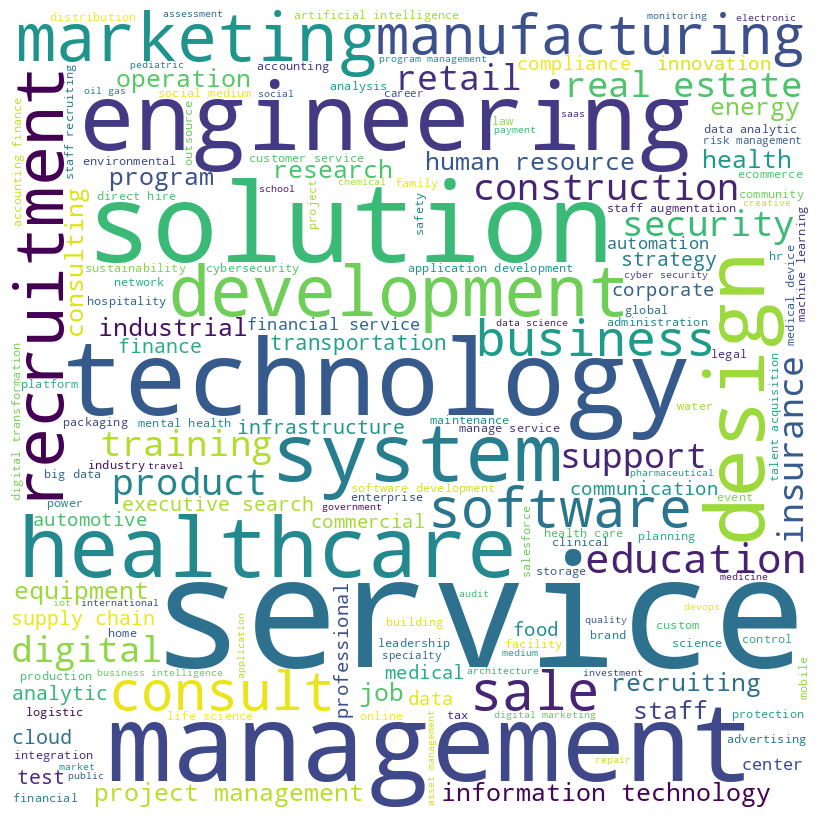

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stop_words),
                min_font_size = 10).generate(speciality_df['speciality'].str.cat(sep=' '))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

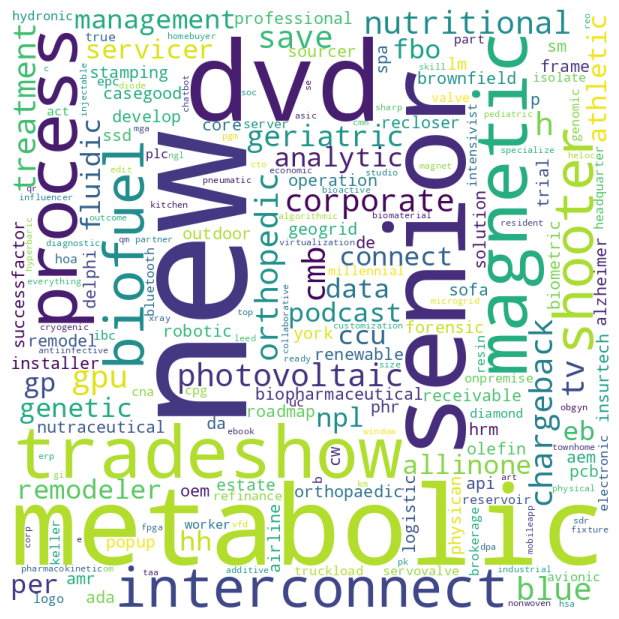

In [ ]:
# Without Duplicated Data
unique_speciality_string = ' '.join(set(speciality_df['speciality'].str.split().sum()))

wordcloud1_1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stop_words),
                min_font_size = 10).generate(unique_speciality_string)

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud1_1)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

- Industry

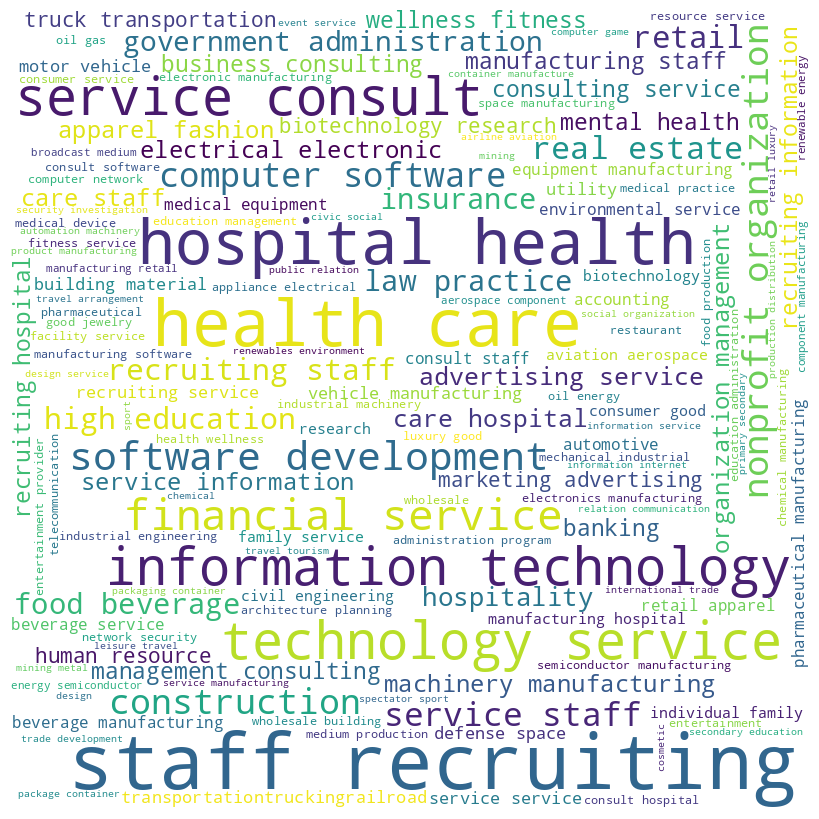

In [ ]:
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stop_words),
                min_font_size = 10).generate(industry_df['industry'].str.cat(sep=' '))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

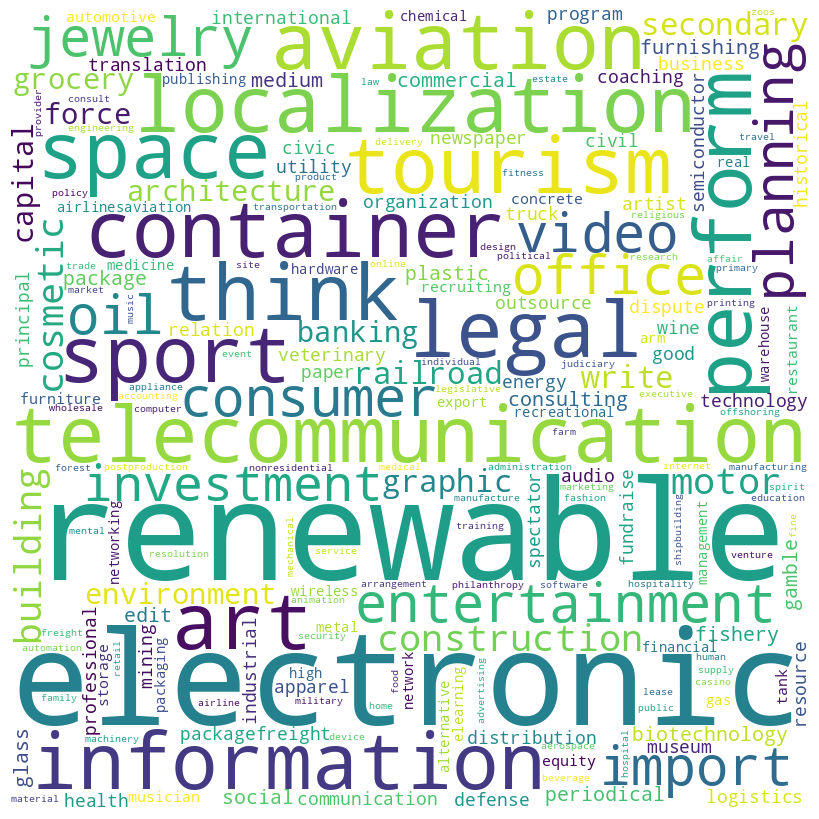

In [ ]:
# Without Duplicated Data
unique_industry_string = ' '.join(set(industry_df['industry'].str.split().sum()))

wordcloud2_1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(stop_words),
                min_font_size = 10).generate(unique_industry_string)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2_1)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

* Skills

In [ ]:
skills_df['skill'].unique()

array(['accounting', 'finance', 'management', 'manufacturing',
       'health care provider', 'engineering', 'information technology',
       'administration', 'sale', 'design', 'art', 'education', 'training',
       'business development', 'project management', 'consult',
       'strategy', 'other', 'research', 'general business', 'marketing',
       'legal', 'customer service', 'quality assurance', 'production',
       'analysis', 'public relation', 'write', 'supply', 'human resource',
       'product management', 'advertising', 'purchasing', 'distribution',
       'science'], dtype=object)

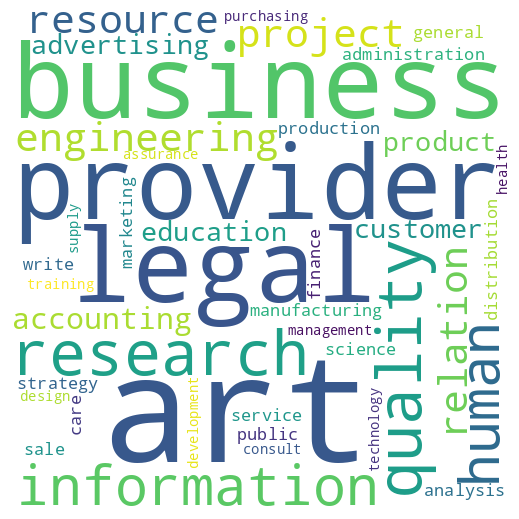

In [ ]:
# Without Duplicated Data
unique_skills_string = ' '.join(set(skills_df['skill'].str.split().sum()))

wordcloud3 = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = set(stop_words)).generate(unique_skills_string)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**job_id - company_id - speciality - industry - skills**<br>
By Using these, Look for Correlations

In [ ]:
jobId_df = job_df[['job_id', 'company_id']]
jobId_df

,job_id,company_id
0,3757940104,553718.0
1,3757940025,2192142.0
2,3757938019,474443.0
3,3757938018,18213359.0
4,3757937095,437225.0
...,...,...
33241,133114754,77766802.0
33242,108965123,NaN
33243,102339515,52132271.0
33244,85008768,NaN


In [ ]:
# Bind all Specialities with same Company Id
speciality_df = speciality_df.groupby('company_id')['speciality'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
speciality_df

,company_id,speciality
0,1009,cloud mobile cognitive security research watso...
1,1016,healthcare biotechnology
2,1021,distribute power gasification generator heavy ...
3,1028,enterprise software application database middl...
4,1033,management consulting system integration techn...
...,...,...
8349,100015344,recruiting healthcare recruit staff recruiting
8350,100235946,ev evse charger installation electronics clean...
8351,100746448,consult implementation service genai ai cloud ...
8352,101053379,game development


In [ ]:
new_df = pd.merge(jobId_df, speciality_df, on='company_id')
new_df

# -> Can be distinguished by job_id

,job_id,company_id,speciality
0,3757940104,553718.0,digital hearing instrument behind ear ear open...
1,3757754488,553718.0,digital hearing instrument behind ear ear open...
2,3757940025,2192142.0,metal fabrication machining robotic welding en...
3,3757934539,2192142.0,metal fabrication machining robotic welding en...
4,3757938019,474443.0,roller chain engineering class chain sprocket ...
...,...,...,...
25963,1494619053,10696333.0,elevator stairlifts wheelchair lift dumbwaiter
25964,1004740969,882349.0,residential foundation design residential fram...
25965,903408693,3894635.0,pecan nut candy cake dry fruit gift basets cor...
25966,133114754,77766802.0,export import clearance bond warehousing ocean...


In [ ]:
new_df = pd.merge(new_df, df[['company_id', 'company_size']], on='company_id')
new_df

,job_id,company_id,speciality,company_size
0,3757940104,553718.0,digital hearing instrument behind ear ear open...,5.0
1,3757754488,553718.0,digital hearing instrument behind ear ear open...,5.0
2,3757940025,2192142.0,metal fabrication machining robotic welding en...,4.0
3,3757934539,2192142.0,metal fabrication machining robotic welding en...,4.0
4,3757938019,474443.0,roller chain engineering class chain sprocket ...,4.0
...,...,...,...,...
25931,1494619053,10696333.0,elevator stairlifts wheelchair lift dumbwaiter,2.0
25932,1004740969,882349.0,residential foundation design residential fram...,2.0
25933,903408693,3894635.0,pecan nut candy cake dry fruit gift basets cor...,2.0
25934,133114754,77766802.0,export import clearance bond warehousing ocean...,1.0


In [ ]:
new_df = new_df.dropna()

-> Other Team Member done Company size prediction

In [ ]:
def convert_to_int(df):
  for col in ['company_id', 'company_size']:
    df[col] = df[col].fillna(0).astype(int)
  return df

new_df = convert_to_int(new_df)
new_df

,job_id,company_id,speciality,company_size
0,3757940104,553718,digital hearing instrument behind ear ear open...,5
1,3757754488,553718,digital hearing instrument behind ear ear open...,5
2,3757940025,2192142,metal fabrication machining robotic welding en...,4
3,3757934539,2192142,metal fabrication machining robotic welding en...,4
4,3757938019,474443,roller chain engineering class chain sprocket ...,4
...,...,...,...,...
25930,1657978824,89350959,midjourney ai prompt engineering chatgpt opena...,2
25931,1494619053,10696333,elevator stairlifts wheelchair lift dumbwaiter,2
25932,1004740969,882349,residential foundation design residential fram...,2
25933,903408693,3894635,pecan nut candy cake dry fruit gift basets cor...,2


In [ ]:
industry_df

,company_id,industry
0,81149246,high education
1,10033339,information technology service
2,6049228,accounting
3,2641066,electrical electronic manufacturing
4,96649998,marketing advertising
...,...,...
12596,10143362,hospitality
12597,2293632,software development
12598,18754113,staff recruiting
12599,10135152,government administration


In [ ]:
industry_df = industry_df.groupby('company_id')['industry'].apply(lambda x: ' '.join(x)).reset_index()
industry_df

,company_id,industry
0,1009,information technology service service consult
1,1016,hospital health care hospital health care
2,1021,renewables environment renewable energy semico...
3,1025,information technology service service consult
4,1028,information technology service service consult
...,...,...
11268,101065652,appliance electrical electronics manufacturing
11269,101068739,truck transportation
11270,101069729,service consult
11271,101173981,nonprofit organization


12601 rows × 2 columns

In [ ]:
new_df = pd.merge(new_df, industry_df[['company_id', 'industry']], on='company_id')
new_df

,job_id,company_id,speciality,company_size,industry
0,3757940104,553718,digital hearing instrument behind ear ear open...,5,retail
1,3757754488,553718,digital hearing instrument behind ear ear open...,5,retail
2,3757940025,2192142,metal fabrication machining robotic welding en...,4,industrial machinery manufacturing
3,3757934539,2192142,metal fabrication machining robotic welding en...,4,industrial machinery manufacturing
4,3757938019,474443,roller chain engineering class chain sprocket ...,4,automation machinery manufacturing
...,...,...,...,...,...
25136,1657978824,89350959,midjourney ai prompt engineering chatgpt opena...,2,fine art
25137,1494619053,10696333,elevator stairlifts wheelchair lift dumbwaiter,2,medical equipment manufacturing
25138,1004740969,882349,residential foundation design residential fram...,2,architecture planning
25139,903408693,3894635,pecan nut candy cake dry fruit gift basets cor...,2,retail


In [ ]:
skills_df = skills_df.groupby('job_id')['skill'].apply(lambda x: ' '.join(x)).reset_index()
skills_df

,job_id,skill
0,3958427,design art information technology
1,85008768,sale business development
2,102339515,business development sale
3,108965123,administration
4,133114754,sale business development
...,...,...
32417,3757937095,information technology
32418,3757938018,management manufacturing
32419,3757938019,engineering
32420,3757940025,management manufacturing


In [ ]:
new_df = pd.merge(new_df, skills_df[['job_id', 'skill']], on='job_id')
new_df

,job_id,company_id,speciality,company_size,industry,skill
0,3757940104,553718,digital hearing instrument behind ear ear open...,5,retail,other
1,3757754488,553718,digital hearing instrument behind ear ear open...,5,retail,health care provider
2,3757940025,2192142,metal fabrication machining robotic welding en...,4,industrial machinery manufacturing,management manufacturing
3,3757934539,2192142,metal fabrication machining robotic welding en...,4,industrial machinery manufacturing,management manufacturing
4,3757938019,474443,roller chain engineering class chain sprocket ...,4,automation machinery manufacturing,engineering
...,...,...,...,...,...,...
24544,1657978824,89350959,midjourney ai prompt engineering chatgpt opena...,2,fine art,other
24545,1494619053,10696333,elevator stairlifts wheelchair lift dumbwaiter,2,medical equipment manufacturing,accounting finance
24546,1004740969,882349,residential foundation design residential fram...,2,architecture planning,engineering information technology
24547,903408693,3894635,pecan nut candy cake dry fruit gift basets cor...,2,retail,administration


In [ ]:
new_df.to_csv('/content/drive/MyDrive/24-1/Data Science/new_df.csv')

=> Train Models with DataFrame that doesn't have NaN